In [1]:
s3_tests = []
for m in ["0", "21","42", "63", "84", "105", "126", "147", "168"]:
    for i in ["00", "01", "02", "03", "04"]:
        s3_tests.append(f"s3://aegovan-data/chemprot_adverserial/predictions_chemprot-adverserial-train-767-210-{m}-{i}-202211142035/202211191630/chemprot_abstract_test.json.json")


In [2]:
import sys, os, pandas as pd, io
sys.path.append("../src")

import utils

In [3]:
import sagemaker
from sklearn.metrics import precision_recall_fscore_support



In [4]:
import io, pandas as pd, re

def create_df(s3_prefix, confidence=0.0):
    
    df  = pd.read_json(io.StringIO(sagemaker.s3.S3Downloader.read_file( s3_prefix)))
    
    total_predictions= len(df)
    df = df.query(f"confidence > {confidence} ")

    name = s3_prefix
    r = re.search(  "predictions_chemprot-adverserial-train-(\d+)-(\d+)-(\d+)", s3_prefix)
    name= s3_prefix
    train_size= int(r.group(1))
    train_pos_size= int(r.group(2))
    train_adverserial_neg= int(r.group(3))
    prediction_above_threshold = len(df)

    p,r,f,s = precision_recall_fscore_support(df["label"], 
                         df["prediction"], pos_label = 1, average="binary", zero_division=0)
        
    return { "Name": name, 
                    "Precision":p,
                    "Recall":r,
                    "F1":f,  
                  #  "Threshold": "HighConfidence", 
                    "Support": s, 
                        "TrainSize":train_size, "TrainSizePositive": train_pos_size,
                        "TrainAdverserialNegative" : train_adverserial_neg,
                        "TrainAdverserialNegativeRate" : train_adverserial_neg/train_pos_size,
                        "PredictionsSize": total_predictions, 
                   "PredictionsAboveThresholdSize": prediction_above_threshold,
                    "PredictionsAboveThresholdRatio" :prediction_above_threshold/total_predictions
           
           }
    
    

def create_dfs_from_prefixes(s3_prefixes):
    result = [ create_df(s, confidence=.90) for s in s3_prefixes]
    df =  pd.DataFrame(result)
    return df


In [5]:
df_stats = create_dfs_from_prefixes(s3_tests)
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize,PredictionsAboveThresholdSize,PredictionsAboveThresholdRatio
0,s3://aegovan-data/chemprot_adverserial/predict...,0.271780,0.487267,0.348936,None,767,210,0,0.0,5744,5218,0.908426
1,s3://aegovan-data/chemprot_adverserial/predict...,0.500000,0.047619,0.086957,None,767,210,0,0.0,5744,1351,0.235202
2,s3://aegovan-data/chemprot_adverserial/predict...,0.325983,0.658915,0.436177,None,767,210,0,0.0,5744,4720,0.821727
3,s3://aegovan-data/chemprot_adverserial/predict...,0.416589,0.762799,0.538879,None,767,210,0,0.0,5744,5196,0.904596
4,s3://aegovan-data/chemprot_adverserial/predict...,0.351035,0.702703,0.468187,None,767,210,0,0.0,5744,5044,0.878134
5,s3://aegovan-data/chemprot_adverserial/predict...,0.446029,0.755172,0.560819,None,767,210,21,0.1,5744,5286,0.920265
6,s3://aegovan-data/chemprot_adverserial/predict...,0.000000,0.000000,0.000000,None,767,210,21,0.1,5744,873,0.151985
7,s3://aegovan-data/chemprot_adverserial/predict...,0.298817,0.650215,0.409459,None,767,210,21,0.1,5744,4747,0.826428
8,s3://aegovan-data/chemprot_adverserial/predict...,0.386095,0.564935,0.458699,None,767,210,21,0.1,5744,4704,0.818942
9,s3://aegovan-data/chemprot_adverserial/predict...,0.355841,0.611418,0.449864,None,767,210,21,0.1,5744,5220,0.908774


In [6]:
df_stats

,Name,Precision,Recall,F1,Support,TrainSize,TrainSizePositive,TrainAdverserialNegative,TrainAdverserialNegativeRate,PredictionsSize,PredictionsAboveThresholdSize,PredictionsAboveThresholdRatio
0,s3://aegovan-data/chemprot_adverserial/predict...,0.271780,0.487267,0.348936,None,767,210,0,0.0,5744,5218,0.908426
1,s3://aegovan-data/chemprot_adverserial/predict...,0.500000,0.047619,0.086957,None,767,210,0,0.0,5744,1351,0.235202
2,s3://aegovan-data/chemprot_adverserial/predict...,0.325983,0.658915,0.436177,None,767,210,0,0.0,5744,4720,0.821727
3,s3://aegovan-data/chemprot_adverserial/predict...,0.416589,0.762799,0.538879,None,767,210,0,0.0,5744,5196,0.904596
4,s3://aegovan-data/chemprot_adverserial/predict...,0.351035,0.702703,0.468187,None,767,210,0,0.0,5744,5044,0.878134
5,s3://aegovan-data/chemprot_adverserial/predict...,0.446029,0.755172,0.560819,None,767,210,21,0.1,5744,5286,0.920265
6,s3://aegovan-data/chemprot_adverserial/predict...,0.000000,0.000000,0.000000,None,767,210,21,0.1,5744,873,0.151985
7,s3://aegovan-data/chemprot_adverserial/predict...,0.298817,0.650215,0.409459,None,767,210,21,0.1,5744,4747,0.826428
8,s3://aegovan-data/chemprot_adverserial/predict...,0.386095,0.564935,0.458699,None,767,210,21,0.1,5744,4704,0.818942
9,s3://aegovan-data/chemprot_adverserial/predict...,0.355841,0.611418,0.449864,None,767,210,21,0.1,5744,5220,0.908774


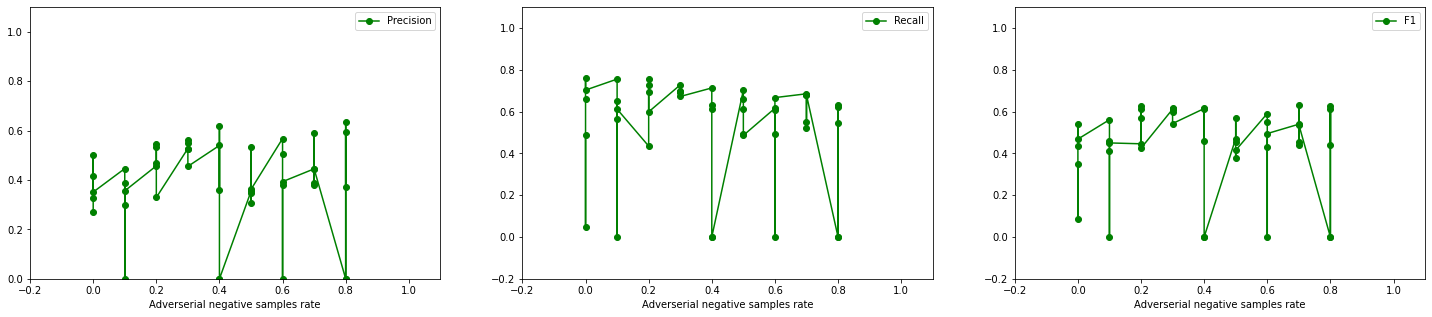

In [7]:
import warnings, matplotlib.pyplot as plt

def plot_comparison(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAdverserialNegativeRate" : "Adverserial negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }

        df[["Precision", "TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(0,1.1), xlim=(-0.2, 1.1), ax=ax[0], color=(my_colors))

        df[["Recall","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[1], color=(my_colors))

        df[["F1","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .plot(x="Adverserial negative samples rate", linestyle =linetype, marker='o', ylim=(-0.2,1.1), xlim=(-0.2, 1.1), ax=ax[2], color=(my_colors))

       
        plt.legend()

plot_comparison(df_stats)   

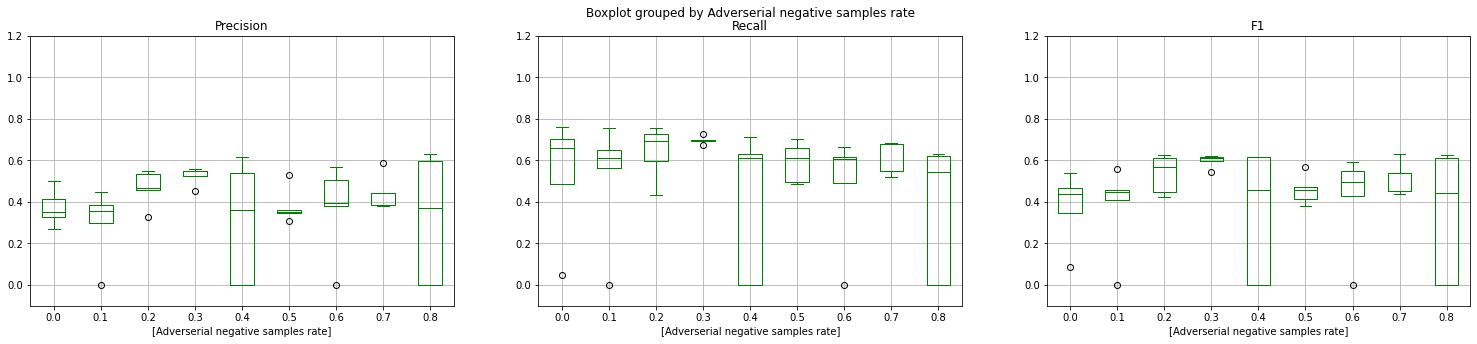

In [8]:
def plot_comparison_box(df):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", message=".*")

        fig, ax = plt.subplots(1,3, figsize=(25,5))
        my_colors= [ "green",  "orange"]
        
        linetype = "-"
        legend_suffix = ""


        column_renames={"Precision": "Precision" , 
                        "TrainAdverserialNegativeRate" : "Adverserial negative samples rate" ,
                        "Recall" : "Recall" , 
                        "F1": "F1" , 
                       }
        ax[0].set_ylim(-0.1,1.2)
        df[["Precision", "TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Adverserial negative samples rate",  ax=ax[0], color="green")

        ax[1].set_ylim(-0.1,1.2)
        df[["Recall","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Adverserial negative samples rate",  ax=ax[1], color="green")

        ax[2].set_ylim(-0.1,1.2)
        df[["F1","TrainAdverserialNegativeRate"]]\
            .rename(columns=column_renames)\
            .boxplot(by="Adverserial negative samples rate",  ax=ax[2], color="green")

       
        #plt.legend()

plot_comparison_box(df_stats)

<AxesSubplot:xlabel='TrainAdverserialNegativeRate', ylabel='PredictionsAboveThresholdRatio'>

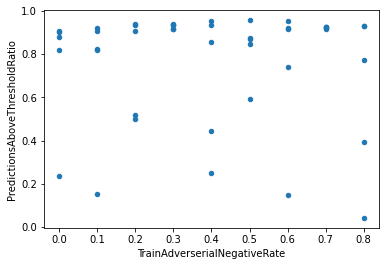

In [16]:
df_stats.plot.scatter(x="TrainAdverserialNegativeRate", y="PredictionsAboveThresholdRatio")

In [10]:
df_stats.groupby("TrainAdverserialNegative")[["Precision", "Recall", "F1", "PredictionsAboveThresholdSize"]].describe().T

TrainAdverserialNegative                     0            21           42   \
Precision                     count     5.000000     5.000000     5.000000   
                              mean      0.373077     0.297356     0.466796   
                              std       0.087988     0.174515     0.086547   
                              min       0.271780     0.000000     0.329087   
                              25%       0.325983     0.298817     0.457143   
                              50%       0.351035     0.355841     0.467113   
                              75%       0.416589     0.386095     0.533493   
                              max       0.500000     0.446029     0.547145   
Recall                        count     5.000000     5.000000     5.000000   
                              mean      0.531860     0.516348     0.642531   
                              std       0.289457     0.297057     0.130568   
                              min       0.047619     0.000000     0.434783   
                              25%       0.487267     0.564935     0.598456   
                              50%       0.658915     0.611418     0.694772   
                              75%       0.702703     0.650215     0.727431   
                              max       0.762799     0.755172     0.757216   
F1                            count     5.000000     5.000000     5.000000   
                              mean      0.375827     0.375769     0.535479   
                              std       0.175305     0.217341     0.094252   
                              min       0.086957     0.000000     0.424658   
                              25%       0.348936     0.409459     0.445682   
                              50%       0.436177     0.449864     0.568907   
                              75%       0.468187     0.458699     0.612184   
                              max       0.538879     0.560819     0.625965   
PredictionsAboveThresholdSize count     5.000000     5.000000     5.000000   
                              mean   4305.800000  4166.000000  4373.400000   
                              std    1663.723895  1859.850128  1317.950606   
                              min    1351.000000   873.000000  2879.000000   
                              25%    4720.000000  4704.000000  2986.000000   
                              50%    5044.000000  4747.000000  5216.000000   
                              75%    5196.000000  5220.000000  5374.000000   
                              max    5218.000000  5286.000000  5412.000000   

TrainAdverserialNegative                     63           84           105  \
Precision                     count     5.000000     5.000000     5.000000   
                              mean      0.523528     0.303512     0.380707   
                              std       0.041332     0.292361     0.087112   
                              min       0.454982     0.000000     0.307175   
                              25%       0.524057     0.000000     0.348968   
                              50%       0.527273     0.360269     0.353774   
                              75%       0.550420     0.539642     0.361734   
                              max       0.560907     0.617647     0.531884   
Recall                        count     5.000000     5.000000     5.000000   
                              mean      0.696418     0.390920     0.590570   
                              std       0.019947     0.358879     0.097055   
                              min       0.671986     0.000000     0.485944   
                              25%       0.691099     0.000000     0.494585   
                              50%       0.694346     0.612350     0.611667   
                              75%       0.697232     0.629412     0.658407   
                              max       0.727425     0.712838     0.702247   
F1                            count     5.000000     5.000000     5.000000   
                     

In [11]:
from scipy import stats


 
    
stats.ttest_ind(df_stats.query("TrainAdverserialNegative == 21")["Precision"], 
                df_stats.query("TrainAdverserialNegative == 63")["Precision"])

Ttest_indResult(statistic=-2.819942997835167, pvalue=0.02249585491233913)

In [12]:
    
stats.ttest_ind(df_stats.query("TrainAdverserialNegative == 0")["Precision"], 
                df_stats.query("TrainAdverserialNegative == 84")["Precision"], alternative="less")

Ttest_indResult(statistic=0.5094881068582978, pvalue=0.6879182487355713)